## --------------------------------------- Model Fitting Part --------------------------------------------

### Data Preprocessing

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.ensemble import IsolationForest
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Final1.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9352 entries, 0 to 9351
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SMO_Age              9352 non-null   int64 
 1   SMO_Gender           9352 non-null   object
 2   SMO_KPI_Grade        9352 non-null   object
 3   Garment_Type         9352 non-null   object
 4   Sub_Garment_Type     9352 non-null   object
 5   Brand                9352 non-null   object
 6   Development_Stage    9352 non-null   object
 7   Sample_Type          9352 non-null   object
 8   Fabric_Complexity    9352 non-null   object
 9   Embellishment_Level  9352 non-null   object
 10  Sewing_Units         9352 non-null   int64 
 11  Incentive_Amount     9352 non-null   int64 
 12  Sewing_Time_Minutes  9352 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 949.9+ KB


In [7]:
df.head()

,SMO_Age,SMO_Gender,SMO_KPI_Grade,Garment_Type,Sub_Garment_Type,Brand,Development_Stage,Sample_Type,Fabric_Complexity,Embellishment_Level,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
0,28,Female,A,Women Lower Body Underwear,G String,Victoria Secret,Medium,Fit Sample,Regular,No Embellishment,8,26,92
1,34,Female,A,Women Lower Body Underwear,Boy Short,Victoria Secret,Medium,Fit Sample,Difficult,Simple,2,61,190
2,26,Female,A,Women Lower Body Underwear,G String,Victoria Secret,Medium,Fit Sample,Regular,No Embellishment,7,26,283
3,32,Female,A,Women Lower Body Underwear,Thong,Victoria Secret,Medium,Fit Sample,Regular,Simple,8,35,474
4,34,Male,Supper,Men Lower Body Underwear,Men Brief,Calvin Klein,Medium,Photoshoot Sample,Regular,Simple,2,43,153


In [9]:
df.isna().sum()

SMO_Age                0
SMO_Gender             0
SMO_KPI_Grade          0
Garment_Type           0
Sub_Garment_Type       0
Brand                  0
Development_Stage      0
Sample_Type            0
Fabric_Complexity      0
Embellishment_Level    0
Sewing_Units           0
Incentive_Amount       0
Sewing_Time_Minutes    0
dtype: int64

In [11]:
df.duplicated().sum()

189

In [13]:
df=df.drop_duplicates()

In [15]:
df.shape

(9163, 13)

In [17]:
df.nunique()

SMO_Age                 23
SMO_Gender               2
SMO_KPI_Grade            5
Garment_Type             4
Sub_Garment_Type        10
Brand                    6
Development_Stage        3
Sample_Type              7
Fabric_Complexity        2
Embellishment_Level      4
Sewing_Units            40
Incentive_Amount       106
Sewing_Time_Minutes    915
dtype: int64

In [19]:
df.dtypes

SMO_Age                 int64
SMO_Gender             object
SMO_KPI_Grade          object
Garment_Type           object
Sub_Garment_Type       object
Brand                  object
Development_Stage      object
Sample_Type            object
Fabric_Complexity      object
Embellishment_Level    object
Sewing_Units            int64
Incentive_Amount        int64
Sewing_Time_Minutes     int64
dtype: object

In [21]:
numerical_columns=df.select_dtypes(include=['int64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [23]:
numerical_columns

Index(['SMO_Age ', 'Sewing_Units ', 'Incentive_Amount ',
       'Sewing_Time_Minutes'],
      dtype='object')

In [25]:
categorical_columns

Index(['SMO_Gender', 'SMO_KPI_Grade', 'Garment_Type', 'Sub_Garment_Type',
       'Brand', 'Development_Stage', 'Sample_Type', 'Fabric_Complexity',
       'Embellishment_Level'],
      dtype='object')

In [27]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['SMO_Age ', 'SMO_Gender', 'SMO_KPI_Grade', 'Garment_Type',
       'Sub_Garment_Type', 'Brand', 'Development_Stage', 'Sample_Type',
       'Fabric_Complexity', 'Embellishment_Level', 'Sewing_Units ',
       'Incentive_Amount ', 'Sewing_Time_Minutes'],
      dtype='object')


In [39]:
def identify_categories(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Variable: {column}")
        print(f"Categories: {unique_values}")
        print("="*30)

identify_categories(df)

Variable: SMO_Age
Categories: [28 34 26 32 42 46 41 27 45 24 38 30 29 36 35 51 43 25 22 40 33 55 50]
Variable: SMO_Gender
Categories: ['Female' 'Male']
Variable: SMO_KPI_Grade
Categories: ['A' 'Supper' 'B' 'C' 'Not Graded']
Variable: Garment_Type
Categories: ['Women Lower Body Underwear' 'Men Lower Body Underwear'
 'Women Upper Body Underwear' 'Men Upper Body Underwear']
Variable: Sub_Garment_Type
Categories: ['G String' 'Boy Short' 'Thong' 'Men Brief' 'Boxer' 'Hipster' 'Cami'
 'Brief' 'Tank Top' 'Bralette']
Variable: Brand
Categories: ['Victoria Secret' 'Calvin Klein' 'Tommy John' 'Lacoste' 'Nike' 'LIDL']
Variable: Development_Stage
Categories: ['Medium' 'First' 'Final']
Variable: Sample_Type
Categories: ['Fit Sample' 'Photoshoot Sample' 'SMS Sample' 'Red Tag Sample'
 'Pre Production Sample' 'Proto Sample' 'Size Set Sample']
Variable: Fabric_Complexity
Categories: ['Regular' 'Difficult']
Variable: Embellishment_Level
Categories: ['No Embellishment' 'Simple' 'Moderate' 'Difficult']
Var

In [41]:
df.describe()

,SMO_Age,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
count,9163.000000,9163.00000,9163.000000,9163.000000
mean,33.154862,5.46022,41.122776,299.278730
std,7.619020,6.32737,21.606558,237.323149
min,22.000000,1.00000,2.000000,18.000000
25%,26.000000,2.00000,28.000000,136.000000
50%,32.000000,3.00000,35.000000,233.000000
75%,40.000000,6.00000,50.000000,391.000000
max,55.000000,40.00000,191.000000,1846.000000


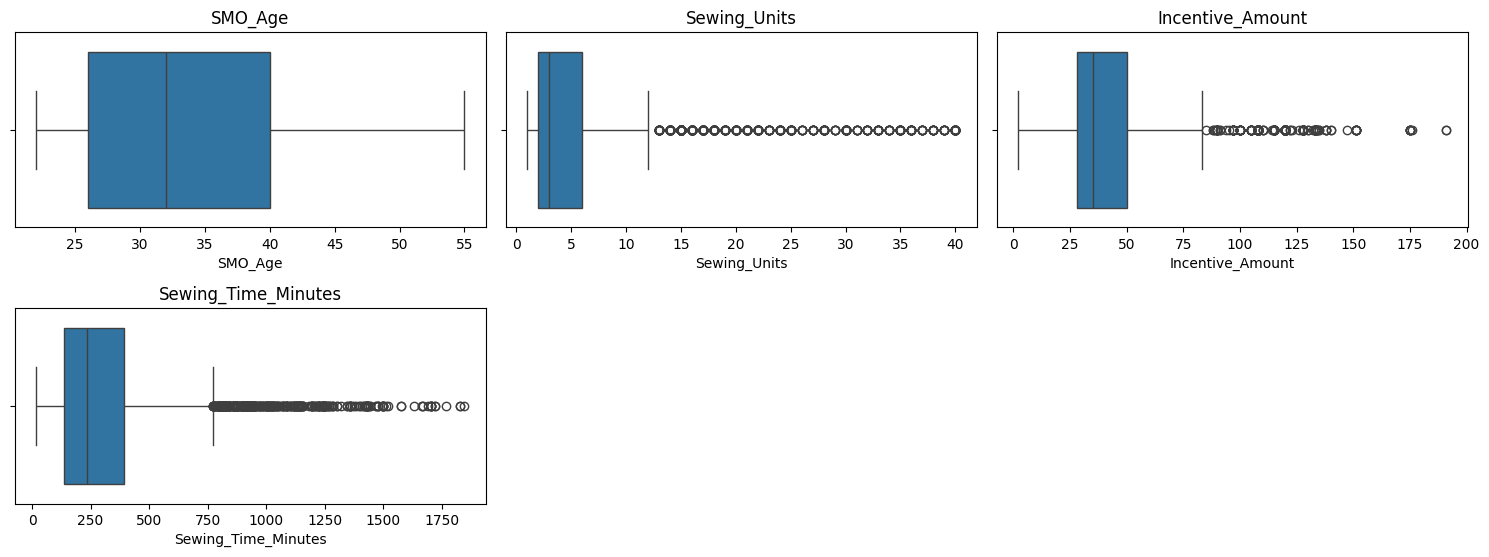

SMO_Age: 0 outliers detected
Sewing_Units: 851 outliers detected
Incentive_Amount: 404 outliers detected
Sewing_Time_Minutes: 419 outliers detected


In [43]:
def detect_outliers_iqr(df):
    outlier_dict = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outlier_dict[column] = outliers
    return outlier_dict


outliers = detect_outliers_iqr(df)


plt.figure(figsize=(15, 8))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


for column, outlier_values in outliers.items():
    print(f"{column}: {len(outlier_values)} outliers detected")

In [45]:
df.describe()

,SMO_Age,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
count,9163.000000,9163.00000,9163.000000,9163.000000
mean,33.154862,5.46022,41.122776,299.278730
std,7.619020,6.32737,21.606558,237.323149
min,22.000000,1.00000,2.000000,18.000000
25%,26.000000,2.00000,28.000000,136.000000
50%,32.000000,3.00000,35.000000,233.000000
75%,40.000000,6.00000,50.000000,391.000000
max,55.000000,40.00000,191.000000,1846.000000


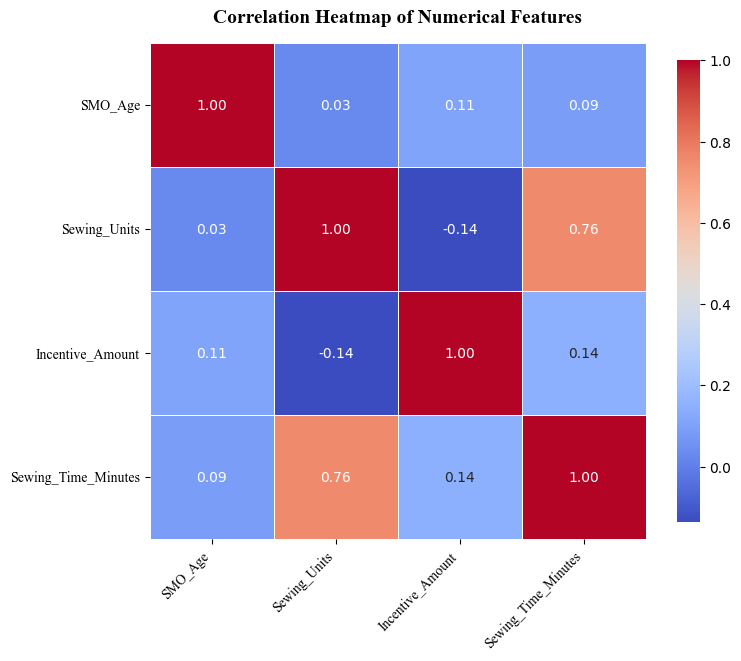

In [47]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])  

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 8))

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm",  
    fmt=".2f", 
    linewidths=0.5, 
    square=True, 
    cbar_kws={"shrink": 0.75}  
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, weight="bold", fontname="Times New Roman", pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10, fontname="Times New Roman")
plt.yticks(rotation=0, fontsize=10, fontname="Times New Roman")


plt.savefig("correlation_numerical.png", dpi=300, bbox_inches='tight')

plt.show()


In [48]:
categorical_columns=df.select_dtypes(include=['object']).columns

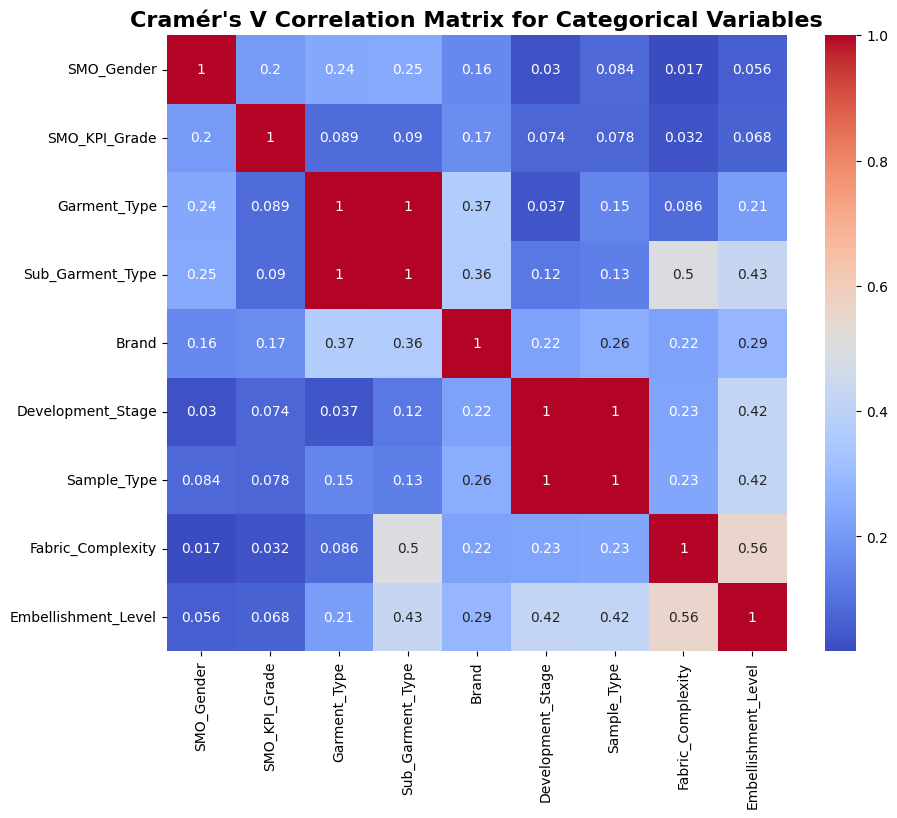

In [49]:
from scipy import stats
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')

plt.title("Cramér's V Correlation Matrix for Categorical Variables", fontsize=16, fontweight='bold')
plt.show()

In [53]:
df = df.drop(['Development_Stage', 'Garment_Type'], axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 0 to 9351
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SMO_Age              9163 non-null   int64 
 1   SMO_Gender           9163 non-null   object
 2   SMO_KPI_Grade        9163 non-null   object
 3   Sub_Garment_Type     9163 non-null   object
 4   Brand                9163 non-null   object
 5   Sample_Type          9163 non-null   object
 6   Fabric_Complexity    9163 non-null   object
 7   Embellishment_Level  9163 non-null   object
 8   Sewing_Units         9163 non-null   int64 
 9   Incentive_Amount     9163 non-null   int64 
 10  Sewing_Time_Minutes  9163 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 859.0+ KB


## Model Fitting 

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

In [60]:
df.head()

,SMO_Age,SMO_Gender,SMO_KPI_Grade,Sub_Garment_Type,Brand,Sample_Type,Fabric_Complexity,Embellishment_Level,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
0,28,Female,A,G String,Victoria Secret,Fit Sample,Regular,No Embellishment,8,26,92
1,34,Female,A,Boy Short,Victoria Secret,Fit Sample,Difficult,Simple,2,61,190
2,26,Female,A,G String,Victoria Secret,Fit Sample,Regular,No Embellishment,7,26,283
3,32,Female,A,Thong,Victoria Secret,Fit Sample,Regular,Simple,8,35,474
4,34,Male,Supper,Men Brief,Calvin Klein,Photoshoot Sample,Regular,Simple,2,43,153


In [62]:
# Function to display unique categories for each variable
def identify_categories(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Variable: {column}")
        print(f"Categories: {unique_values}")
        print("="*30)

identify_categories(df)

Variable: SMO_Age
Categories: [28 34 26 32 42 46 41 27 45 24 38 30 29 36 35 51 43 25 22 40 33 55 50]
Variable: SMO_Gender
Categories: ['Female' 'Male']
Variable: SMO_KPI_Grade
Categories: ['A' 'Supper' 'B' 'C' 'Not Graded']
Variable: Sub_Garment_Type
Categories: ['G String' 'Boy Short' 'Thong' 'Men Brief' 'Boxer' 'Hipster' 'Cami'
 'Brief' 'Tank Top' 'Bralette']
Variable: Brand
Categories: ['Victoria Secret' 'Calvin Klein' 'Tommy John' 'Lacoste' 'Nike' 'LIDL']
Variable: Sample_Type
Categories: ['Fit Sample' 'Photoshoot Sample' 'SMS Sample' 'Red Tag Sample'
 'Pre Production Sample' 'Proto Sample' 'Size Set Sample']
Variable: Fabric_Complexity
Categories: ['Regular' 'Difficult']
Variable: Embellishment_Level
Categories: ['No Embellishment' 'Simple' 'Moderate' 'Difficult']
Variable: Sewing_Units
Categories: [ 8  2  7  1  3  4  5  6 12  9 18 17 11 10 25 16 14 30 40 15 13 20 22 36
 28 34 32 39 38 24 26 19 33 21 35 27 23 29 31 37]
Variable: Incentive_Amount
Categories: [ 26  61  35  43  22  1

In [64]:
if 'Sewing_Units' in df.columns:
    df['Sewing_Units'] = round(np.log(df['Sewing_Units']), 2)
if 'Incentive_Amount' in df.columns:
    df['Incentive_Amount'] = round(np.log(df['Incentive_Amount']), 2)
if 'SMO_Age' in df.columns:
    df['SMO_Age'] = round(np.log(df['SMO_Age']), 2)
if 'Sewing_Time_Minutes' in df.columns:
    df['Sewing_Time_Minutes'] = round(np.log(df['Sewing_Time_Minutes']), 2)

df.head()

,SMO_Age,SMO_Gender,SMO_KPI_Grade,Sub_Garment_Type,Brand,Sample_Type,Fabric_Complexity,Embellishment_Level,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
0,3.33,Female,A,G String,Victoria Secret,Fit Sample,Regular,No Embellishment,2.08,3.26,4.52
1,3.53,Female,A,Boy Short,Victoria Secret,Fit Sample,Difficult,Simple,0.69,4.11,5.25
2,3.26,Female,A,G String,Victoria Secret,Fit Sample,Regular,No Embellishment,1.95,3.26,5.65
3,3.47,Female,A,Thong,Victoria Secret,Fit Sample,Regular,Simple,2.08,3.56,6.16
4,3.53,Male,Supper,Men Brief,Calvin Klein,Photoshoot Sample,Regular,Simple,0.69,3.76,5.03


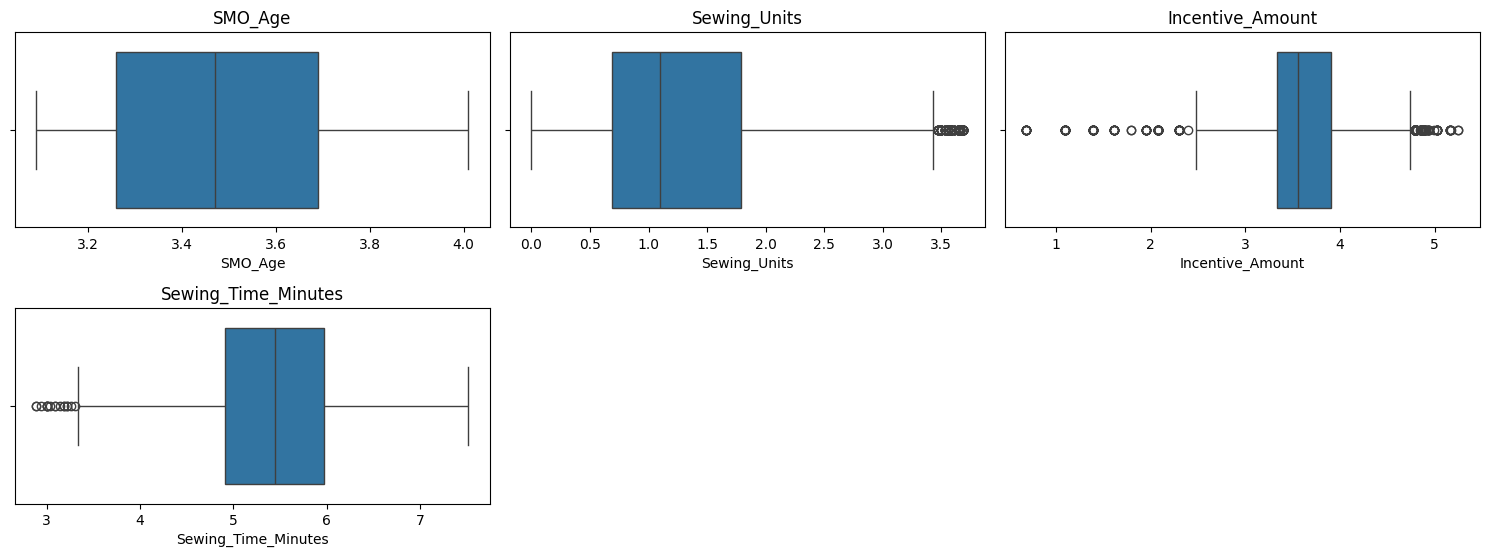

SMO_Age: 0 outliers detected
Sewing_Units: 137 outliers detected
Incentive_Amount: 331 outliers detected
Sewing_Time_Minutes: 17 outliers detected


In [66]:
def detect_outliers_iqr(df):
    outlier_dict = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outlier_dict[column] = outliers
    return outlier_dict

outliers = detect_outliers_iqr(df)

plt.figure(figsize=(15, 8))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

for column, outlier_values in outliers.items():
    print(f"{column}: {len(outlier_values)} outliers detected")

In [67]:
kpi_grade_scores = {'Supper': 5, 'A': 4, 'B': 3, 'C': 2, 'Not Graded': 1}
fabric_type_scores = {'Regular': 1, 'Difficult': 2}
embellishment_scores = {'No Embellishment': 1, 'Simple': 2, 'Moderate': 3, 'Difficult': 4}
sample_type_scores = {'Proto Sample': 1, 'SMS Sample': 2, 'Fit Sample': 3, 'Photoshoot Sample': 4, 'Size Set Sample': 5, 'Pre Production Sample': 6, 'Red Tag Sample': 7}
sub_garment_scores = {'G String': 1, 'Cami': 2, 'Tank Top': 3, 'Thong': 4, 'Hipster': 5, 'Men Brief': 6, 'Brief': 7, 'Boy Short': 8, 'Bralette': 9, 'Boxer': 10}
brand_scores={'Victoria Secret':1, 'Calvin Klein':2, 'Tommy John':3, 'LIDL':4, 'Nike':5, 'Lacoste':6}
smo_gender_scores={'Female':1, 'Male':2}
garment_scores={'Women Lower Body Underwear':1, 'Men Lower Body Underwear':2, 'Women Upper Body Underwear':3, 'Men Upper Body Underwear': 4}

In [70]:
df['SMO_KPI_Grade'] = df['SMO_KPI_Grade'].map(kpi_grade_scores)
df['Embellishment_Level'] = df['Embellishment_Level'].map(embellishment_scores)
df['Sample_Type'] = df['Sample_Type'].map(sample_type_scores)
df['Sub_Garment_Type'] = df['Sub_Garment_Type'].map(sub_garment_scores)
df['Brand'] = df['Brand'].map(brand_scores)
df['SMO_Gender'] = df['SMO_Gender'].map(smo_gender_scores)
df['Fabric_Complexity'] = df['Fabric_Complexity'].map(fabric_type_scores)

In [72]:
df.head()

,SMO_Age,SMO_Gender,SMO_KPI_Grade,Sub_Garment_Type,Brand,Sample_Type,Fabric_Complexity,Embellishment_Level,Sewing_Units,Incentive_Amount,Sewing_Time_Minutes
0,3.33,1,4,1,1,3,1,1,2.08,3.26,4.52
1,3.53,1,4,8,1,3,2,2,0.69,4.11,5.25
2,3.26,1,4,1,1,3,1,1,1.95,3.26,5.65
3,3.47,1,4,4,1,3,1,2,2.08,3.56,6.16
4,3.53,2,5,6,2,4,1,2,0.69,3.76,5.03


In [74]:
df.isna().sum()

SMO_Age                0
SMO_Gender             0
SMO_KPI_Grade          0
Sub_Garment_Type       0
Brand                  0
Sample_Type            0
Fabric_Complexity      0
Embellishment_Level    0
Sewing_Units           0
Incentive_Amount       0
Sewing_Time_Minutes    0
dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

X = df.drop(['Sewing_Time_Minutes'], axis =1 )
y = df['Sewing_Time_Minutes']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 0 to 9351
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMO_Age              9163 non-null   float64
 1   SMO_Gender           9163 non-null   int64  
 2   SMO_KPI_Grade        9163 non-null   int64  
 3   Sub_Garment_Type     9163 non-null   int64  
 4   Brand                9163 non-null   int64  
 5   Sample_Type          9163 non-null   int64  
 6   Fabric_Complexity    9163 non-null   int64  
 7   Embellishment_Level  9163 non-null   int64  
 8   Sewing_Units         9163 non-null   float64
 9   Incentive_Amount     9163 non-null   float64
 10  Sewing_Time_Minutes  9163 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 859.0 KB


### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R² Score: 0.8984
Mean Absolute Error: 0.1754


In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
print("\nTraining Performance")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")
print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
print("\nTest Performance")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print(f"Root Mean Squared Error: {test_rmse:.4f}")


Training Performance
R² Score: 0.9064
Mean Absolute Error: 0.1630
Root Mean Squared Error: 0.2334

Test Performance
R² Score: 0.8984
Mean Absolute Error: 0.1754
Root Mean Squared Error: 0.2519


### Check Linear Regression Assumption

In [88]:
# Compute residuals
residuals = y_test - y_pred

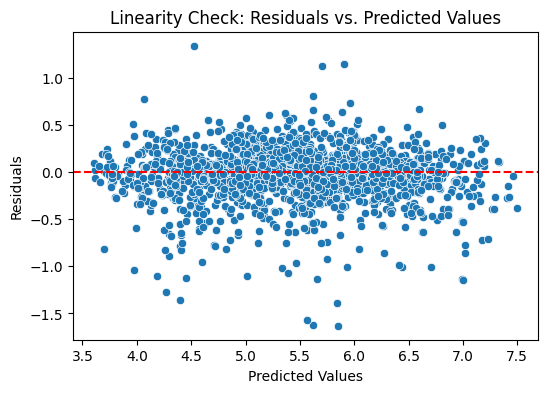

In [90]:
### 1. LINEARITY ASSUMPTION and 2. HOMOSCEDASTICITY###
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs. Predicted Values")
plt.show()

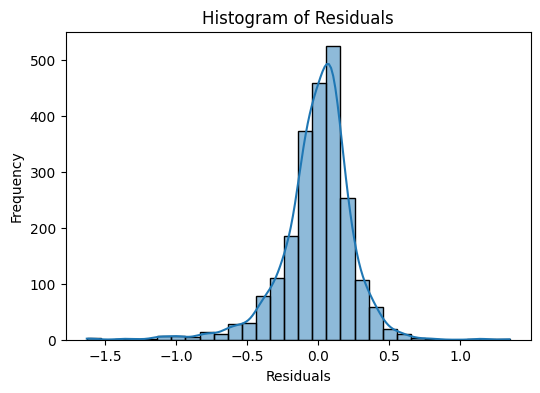

In [92]:
### 2. NORMALITY OF RESIDUALS ###
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

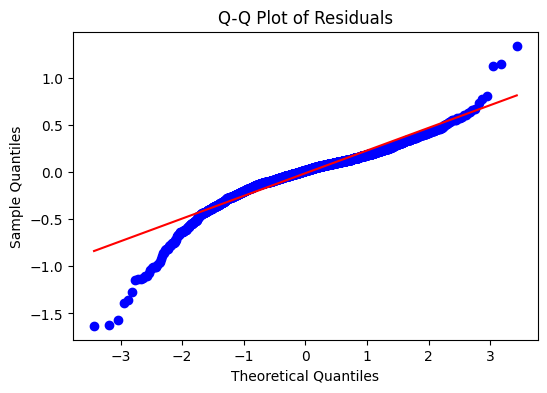

In [93]:
import scipy.stats as stats
# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [96]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue < 0.05:
    print("Residuals are NOT normally distributed (p < 0.05)")
else:
    print("Residuals appear to be normally distributed (p >= 0.05)")

Shapiro-Wilk Test p-value: 0.0000
Residuals are NOT normally distributed (p < 0.05)


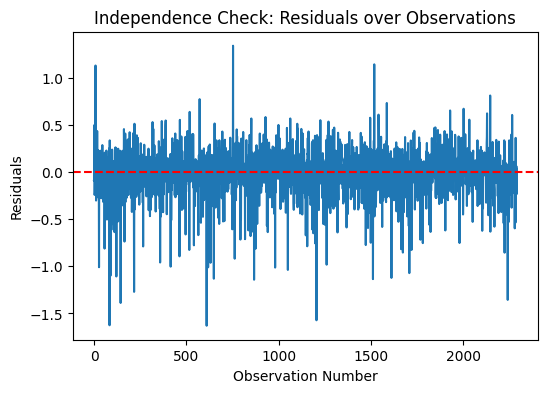

In [100]:
### 3. INDEPENDENCE OF RESIDUALS (No Autocorrelation of Residuals) ###
plt.figure(figsize=(6, 4))
sns.lineplot(x=range(len(residuals)), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Observation Number")
plt.ylabel("Residuals")
plt.title("Independence Check: Residuals over Observations")
plt.show()

In [102]:
# DURBIN-WATSON TEST
import statsmodels.api as sm
dw_test = sm.stats.stattools.durbin_watson(residuals)
print(f"\nDurbin-Watson Test Statistic: {dw_test:.4f}")
if 1.5 < dw_test < 2.5:
    print("Residuals are likely independent.")
else:
    print("Possible autocorrelation in residuals.")


Durbin-Watson Test Statistic: 2.0240
Residuals are likely independent.


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 0 to 9351
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMO_Age              9163 non-null   float64
 1   SMO_Gender           9163 non-null   int64  
 2   SMO_KPI_Grade        9163 non-null   int64  
 3   Sub_Garment_Type     9163 non-null   int64  
 4   Brand                9163 non-null   int64  
 5   Sample_Type          9163 non-null   int64  
 6   Fabric_Complexity    9163 non-null   int64  
 7   Embellishment_Level  9163 non-null   int64  
 8   Sewing_Units         9163 non-null   float64
 9   Incentive_Amount     9163 non-null   float64
 10  Sewing_Time_Minutes  9163 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 859.0 KB


In [104]:
#### 4.MULTICOLLINEARTY Check ####
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
               Feature        VIF
0              SMO_Age  78.568531
1           SMO_Gender   9.313844
2        SMO_KPI_Grade  13.108373
3     Sub_Garment_Type  10.054089
4                Brand   4.136680
5          Sample_Type   7.119471
6    Fabric_Complexity  15.854177
7  Embellishment_Level  14.202330
8         Sewing_Units   3.548067
9     Incentive_Amount  94.864215


In [108]:
# Here linearity assumptions are violated. 

### Ridge Regression

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

Ridge_Model = {
    'Ridge Regression': (Ridge(random_state=42), {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    })
}

for name, (ridge_model, param_grid) in Ridge_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    
    grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
   
    best_model_ridge = grid_search.best_estimator_
    
   
    train_pred = best_model_ridge.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    
    test_pred = best_model_ridge.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
   
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))



Ridge Regression
Best Hyperparameters: {'alpha': 1, 'solver': 'lsqr'}

Training Performance
R² Score: 0.9064
Mean Absolute Error: 0.1630
Root Mean Squared Error: 0.2334

Test Performance
R² Score: 0.8984
Mean Absolute Error: 0.1754
Root Mean Squared Error: 0.2519



### Lasso Regression

In [114]:
from sklearn.linear_model import Ridge, Lasso

Lasso_Model = {
    'Lasso Regression': (Lasso(random_state=42), {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'max_iter': [1000, 5000, 10000]
    })
}

In [116]:
for name, (lasso_model, param_grid) in Lasso_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
   
    grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
  
    best_model_lasso = grid_search.best_estimator_
    
  
    train_pred = best_model_lasso.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
   
    test_pred = best_model_lasso.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))



Lasso Regression
Best Hyperparameters: {'alpha': 0.01, 'max_iter': 1000}

Training Performance
R² Score: 0.9029
Mean Absolute Error: 0.1640
Root Mean Squared Error: 0.2377

Test Performance
R² Score: 0.8971
Mean Absolute Error: 0.1741
Root Mean Squared Error: 0.2535



In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Decision Tree Regression

In [120]:
Decision_Tree_Model = {
    'Decision Tree Regressor': (DecisionTreeRegressor(random_state=42), {
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

In [121]:
for name, (Decision_Tree_Model, param_grid) in Decision_Tree_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    grid_search = GridSearchCV(Decision_Tree_Model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
   
    best_model_DT = grid_search.best_estimator_
    
   
    train_pred = best_model_DT.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
  
    test_pred = best_model_DT.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


Decision Tree Regressor
Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}

Training Performance
R² Score: 0.9771
Mean Absolute Error: 0.0671
Root Mean Squared Error: 0.1156

Test Performance
R² Score: 0.9364
Mean Absolute Error: 0.1185
Root Mean Squared Error: 0.1993



### Random Forest Regression

In [125]:
Random_Forest_Model = {
    'Random Forest Regressor': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

In [127]:
for name, (Random_Forest_Model, param_grid) in Random_Forest_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    
    grid_search = GridSearchCV(Random_Forest_Model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
   
    best_model_RF = grid_search.best_estimator_
    
  
    train_pred = best_model_RF.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    
    test_pred = best_model_RF.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


Random Forest Regressor
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Training Performance
R² Score: 0.9862
Mean Absolute Error: 0.0526
Root Mean Squared Error: 0.0896

Test Performance
R² Score: 0.9515
Mean Absolute Error: 0.1021
Root Mean Squared Error: 0.1741



### K-Nearest Neighbors Regression

In [129]:
K_Nearest_Neighbors_Model = {
    'K-Nearest Neighbors Regressor': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    })
}

In [131]:
for name, (K_Nearest_Neighbors_Model, param_grid) in K_Nearest_Neighbors_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    
    grid_search = GridSearchCV(K_Nearest_Neighbors_Model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
  
    best_model_KNN = grid_search.best_estimator_
    
    
    train_pred = best_model_KNN.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    
    test_pred = best_model_KNN.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
   
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


K-Nearest Neighbors Regressor
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Training Performance
R² Score: 0.9962
Mean Absolute Error: 0.0127
Root Mean Squared Error: 0.0467

Test Performance
R² Score: 0.8738
Mean Absolute Error: 0.1989
Root Mean Squared Error: 0.2808



### Support Vector Regression (Non-Linear 'rbf')

In [134]:
Support_Vector_Model = {
    'Support Vector Regressor': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'], # Non Linear
        'gamma': ['scale', 'auto'] 
    })
}

In [136]:
for name, (Support_Vector_Model, param_grid) in Support_Vector_Model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
   
    grid_search = GridSearchCV(Support_Vector_Model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
   
    best_model_SVM = grid_search.best_estimator_
    
    
    train_pred = best_model_SVM.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    
    test_pred = best_model_SVM.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
  
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


Support Vector Regressor
Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Training Performance
R² Score: 0.9699
Mean Absolute Error: 0.0872
Root Mean Squared Error: 0.1323

Test Performance
R² Score: 0.9467
Mean Absolute Error: 0.1165
Root Mean Squared Error: 0.1824



### Gradient Boosting Regression

In [138]:
GBR_model = {
    'Gradient Boosting Regressor': (GradientBoostingRegressor(random_state=123), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    })
}

In [140]:
for name, (GBR_model, param_grid) in GBR_model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
   
    grid_search = GridSearchCV(GBR_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    
    best_model_GBR = grid_search.best_estimator_
    
    
    train_pred = best_model_GBR.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
   
    test_pred = best_model_GBR.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
  
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


Gradient Boosting Regressor
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

Training Performance
R² Score: 0.9813
Mean Absolute Error: 0.0682
Root Mean Squared Error: 0.1044

Test Performance
R² Score: 0.9563
Mean Absolute Error: 0.0993
Root Mean Squared Error: 0.1652



### XGBoost Regression

In [142]:
XGB_model = {
    'XGBoost Regressor': (XGBRegressor(random_state=123), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.02, 0.5],
        'max_depth': [3, 5, 10]
    })
}

In [144]:
for name, (XGB_model, param_grid) in XGB_model.items():
    print(f"\n{name}")
    print("=" * len(name))
    
    
    grid_search = GridSearchCV(XGB_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    
    best_model_XGB = grid_search.best_estimator_
    
    
    train_pred = best_model_XGB.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
   
    test_pred = best_model_XGB.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
   
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


XGBoost Regressor
Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}

Training Performance
R² Score: 0.9720
Mean Absolute Error: 0.0826
Root Mean Squared Error: 0.1276

Test Performance
R² Score: 0.9540
Mean Absolute Error: 0.1049
Root Mean Squared Error: 0.1695



### LightGBM Regression

In [146]:
LightGBM_model = {
    'LightGBM Regressor': (LGBMRegressor(random_state=123), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20],
        'lambda_l2': [0, 0.1, 1, 10]
    })
}

In [148]:
for name, (LightGBM_model , param_grid) in LightGBM_model.items():
    print(f"\n{name}")
    print("=" * len(name))
    

    grid_search = GridSearchCV(LightGBM_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    
    best_model_LightGBM = grid_search.best_estimator_
    
  
    train_pred = best_model_LightGBM.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
   
    test_pred = best_model_LightGBM.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
  
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    
    print("\nTraining Performance")
    print(f"R² Score: {train_r2:.4f}")
    print(f"Mean Absolute Error: {train_mae:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    
    print("\nTest Performance")
    print(f"R² Score: {test_r2:.4f}")
    print(f"Mean Absolute Error: {test_mae:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    
    print("\n" + "=" * len(name))


LightGBM Regressor
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 6872, number of used features: 10
[LightGBM] [Info] Start training from score 5.423063
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
Best Hyperparameters: {'lambda_l2': 10, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}

Training Performance
R² Score: 0.9790
Mean Absolute Error: 0.0724
Root Mean Squared Error: 0.1106

Test Performance
R² Score: 0.956

### Feature selection for the LightGBM model as a best fitted model.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 6872, number of used features: 10
[LightGBM] [Info] Start training from score 5.423063


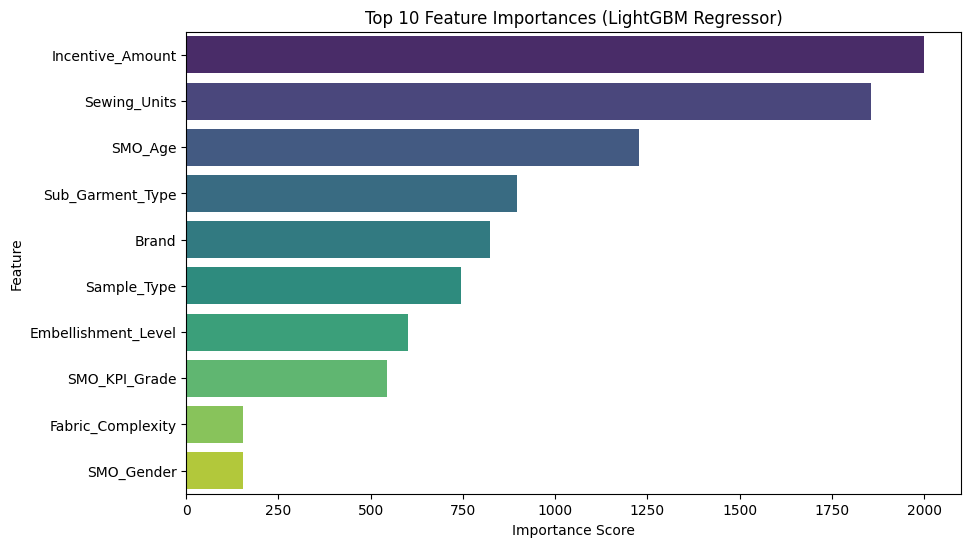

Top Feature Importances:
                Feature  Importance
9     Incentive_Amount        2001
8         Sewing_Units        1856
0              SMO_Age        1227
3     Sub_Garment_Type         896
4                Brand         823
5          Sample_Type         744
7  Embellishment_Level         602
2        SMO_KPI_Grade         544
6    Fabric_Complexity         154
1           SMO_Gender         153


In [150]:
import lightgbm as lgb

# Define the LightGBM Regressor with best hyperparameters
lgb_regressor = lgb.LGBMRegressor(
    learning_rate=0.1, 
    max_depth=-1,  
    n_estimators=300, 
    random_state=123
)

lgb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = lgb_regressor.feature_importances_
features = X_train.columns  

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(11)

# Plot feature importance using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
plt.title('Top 10 Feature Importances (LightGBM Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.savefig("Top_10_Feature.png", bbox_inches='tight')  # For presentations

plt.show()

# Print feature importance values
print("Top Feature Importances:\n", top_features)


In [168]:
### Create a Pickle file using seralization
import pickle
pickle_out = open("best_model_LightGBM.pkl","wb")
pickle.dump(best_model_LightGBM,pickle_out)
pickle_out.close()